In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Giả sử df là DataFrame của bạn
df = pd.read_csv('global_air_pollution_data.csv')  # Đọc dữ liệu từ file CSV
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [113]:
df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [114]:
df = df.rename(columns={'co_aqi_value\t':'co_aqi_value'})
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [115]:
df = df[['aqi_category','aqi_value', 'co_aqi_value','no2_aqi_value','ozone_aqi_value', 'pm2.5_aqi_value']]
df

,aqi_category,aqi_value,co_aqi_value,no2_aqi_value,ozone_aqi_value,pm2.5_aqi_value
0,Moderate,51,1,0,36,51
1,Good,41,1,1,5,41
2,Moderate,66,1,2,39,66
3,Good,34,1,0,34,20
4,Good,22,0,0,22,6
...,...,...,...,...,...,...
23458,Unhealthy,184,3,2,154,184
23459,Good,50,1,5,20,50
23460,Good,50,1,1,22,50
23461,Moderate,71,1,2,44,71


In [119]:
print(f'Trước khi drop các dòng trùng lắp: {df.shape}')
print('Sau khi drop cac dong trung lap:')
print(df.drop_duplicates().shape)
df = df.drop_duplicates().reset_index(drop=True)


Trước khi drop các dòng trùng lắp: (23463, 6)
Sau khi drop cac dong trung lap:
(17100, 6)


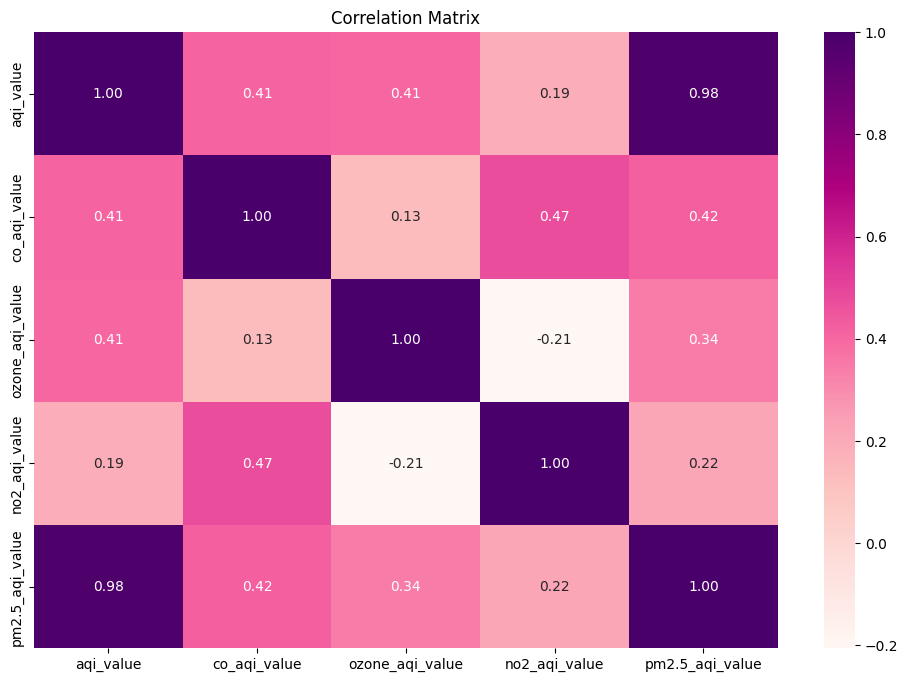

                 aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
aqi_value         1.000000      0.410996         0.406573       0.189888   
co_aqi_value      0.410996      1.000000         0.130560       0.473282   
ozone_aqi_value   0.406573      0.130560         1.000000      -0.205340   
no2_aqi_value     0.189888      0.473282        -0.205340       1.000000   
pm2.5_aqi_value   0.984487      0.422257         0.341401       0.219444   

                 pm2.5_aqi_value  
aqi_value               0.984487  
co_aqi_value            0.422257  
ozone_aqi_value         0.341401  
no2_aqi_value           0.219444  
pm2.5_aqi_value         1.000000  


In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['aqi_value', 'co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [121]:
#drop cột aqi value vì nó tương quan với pm2.5 value
df = df.drop(columns='aqi_value')
print('df sau khi drop các aqi_value')
df


df sau khi drop các aqi_value


,aqi_category,co_aqi_value,no2_aqi_value,ozone_aqi_value,pm2.5_aqi_value
0,Moderate,1,0,36,51
1,Good,1,1,5,41
2,Moderate,1,2,39,66
3,Good,1,0,34,20
4,Good,0,0,22,6
...,...,...,...,...,...
17095,Unhealthy,3,1,160,79
17096,Moderate,1,5,34,54
17097,Unhealthy,3,2,154,184
17098,Good,1,1,22,50


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Chọn các đặc trưng và nhãn
X = df[["co_aqi_value", "no2_aqi_value", "ozone_aqi_value", "pm2.5_aqi_value"]]  # Chọn các đặc trưng
y = df['aqi_category']  # Chọn nhãn
# Mã hóa nhãn
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [123]:
# Sử dụng Mutual Information
mi_scores = mutual_info_classif(X, y_encoded)
mi_results = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
print("Mutual Information Results:\n", mi_results)


Mutual Information Results:
            Feature  Mutual Information
0     co_aqi_value            0.260625
1    no2_aqi_value            0.057476
2  ozone_aqi_value            0.166221
3  pm2.5_aqi_value            1.190262


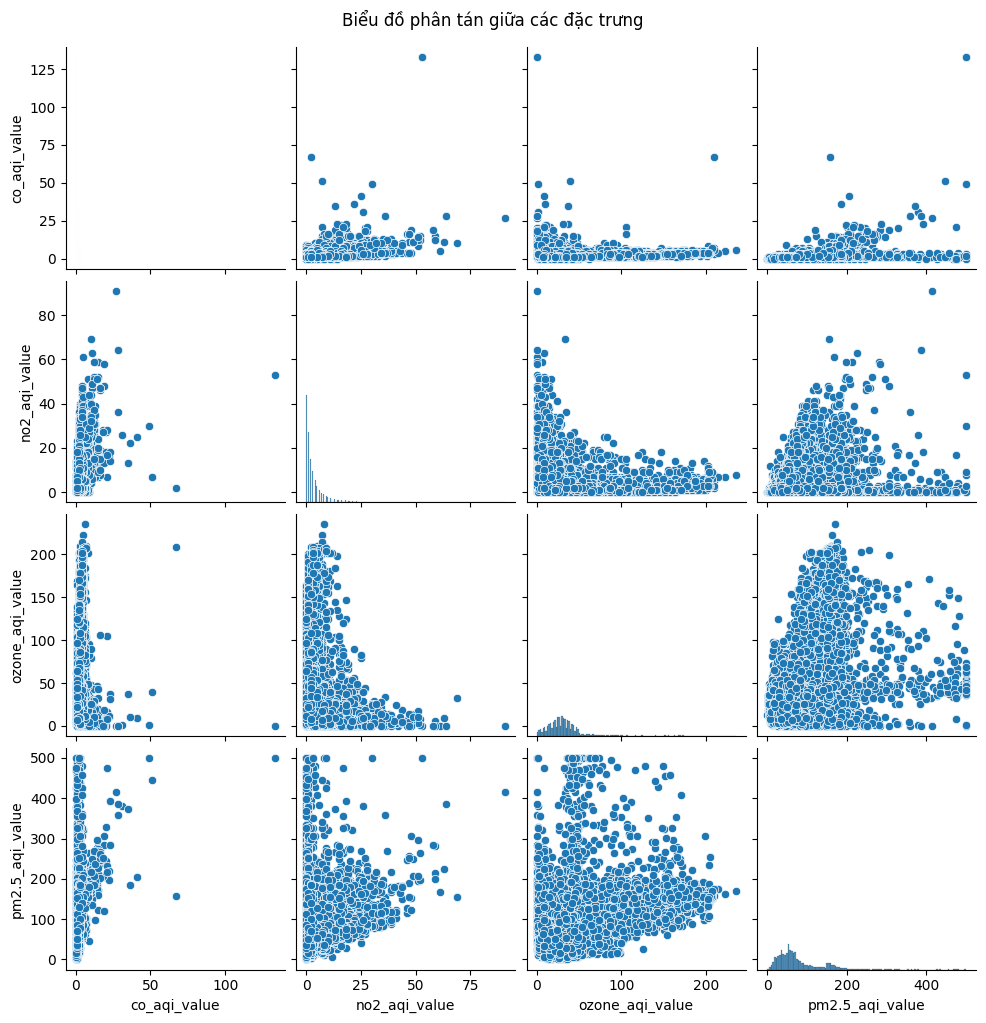

In [124]:
# Vẽ biểu đồ phân tán giữa các cặp đặc trưng
sns.pairplot(df)
plt.suptitle("Biểu đồ phân tán giữa các đặc trưng", y=1.02)
plt.show()

aqi_category
Moderate                          6995
Good                              5979
Unhealthy                         2109
Unhealthy for Sensitive Groups    1547
Very Unhealthy                     286
Hazardous                          184
Name: count, dtype: int64


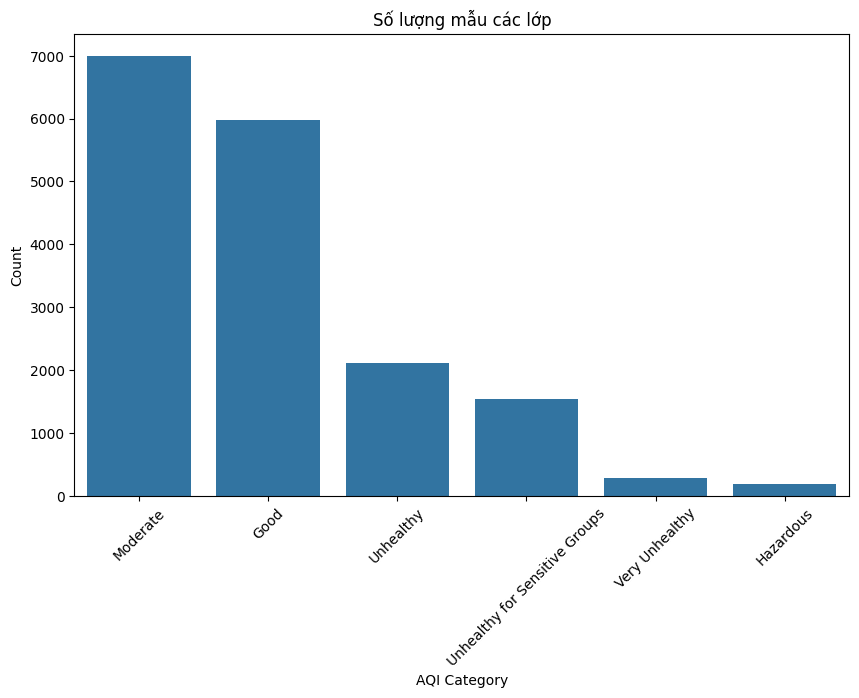

In [125]:
# Xem số lượng các lớp trong cột aqi_category
class_counts = df['aqi_category'].value_counts()

# In ra số lượng các lớp
print(class_counts)

# Vẽ biểu đồ số lượng các lớp
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Số lượng mẫu các lớp')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần thiết
plt.show()

In [126]:
df = df[~df['aqi_category'].isin(['Very Unhealthy', 'Hazardous'])].reset_index(drop=True)
print(f'Data frame sau khi drop các dòng có aqi_category là Very Unhealthy hoặc Hazardous {df.shape}')


Data frame sau khi drop các dòng có aqi_category là Very Unhealthy hoặc Hazardous (16630, 5)


aqi_category
Moderate                          6995
Good                              5979
Unhealthy                         2109
Unhealthy for Sensitive Groups    1547
Name: count, dtype: int64


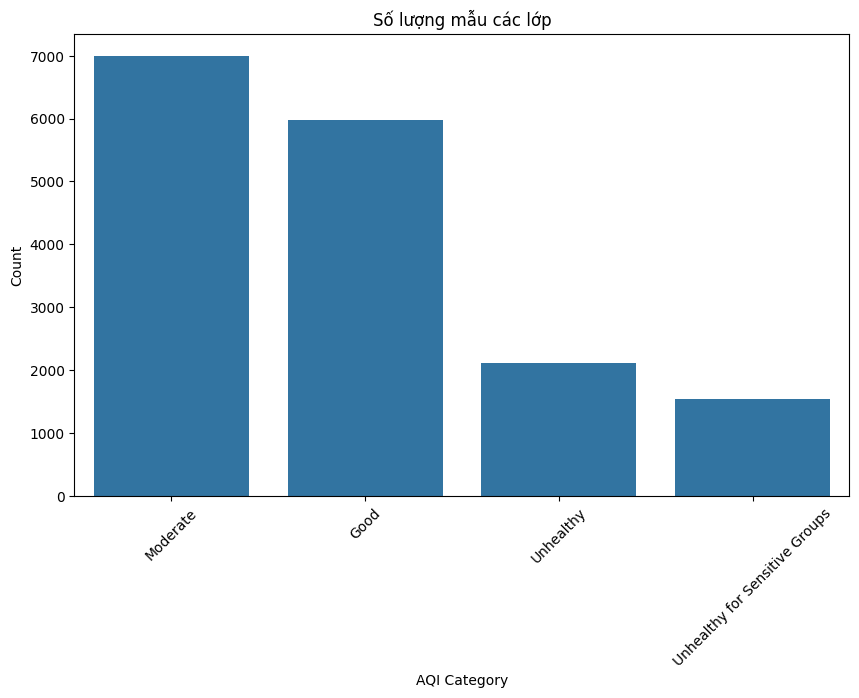

In [127]:
#Sau khi drop các lớp thiểu số
class_counts = df['aqi_category'].value_counts()

print(class_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Số lượng mẫu các lớp')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [128]:
#Dữ liệu của cột co_aqi_value lớn hơn 10
print(df.shape)
print(df[df['co_aqi_value'] > 10 ].count())

(16630, 5)
aqi_category       30
co_aqi_value       30
no2_aqi_value      30
ozone_aqi_value    30
pm2.5_aqi_value    30
dtype: int64


In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
co_aqi_value,16630.0,1.469633,1.360512,0.0,1.0,1.0,2.0,36.0
no2_aqi_value,16630.0,3.675346,5.579779,0.0,0.0,2.0,5.0,69.0
ozone_aqi_value,16630.0,35.401082,29.973902,0.0,19.0,29.0,40.0,200.0
pm2.5_aqi_value,16630.0,71.324775,45.082291,0.0,39.0,59.0,89.0,200.0


In [130]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self
    def transform(self, X):
        return X.clip(self.lower, self.upper)

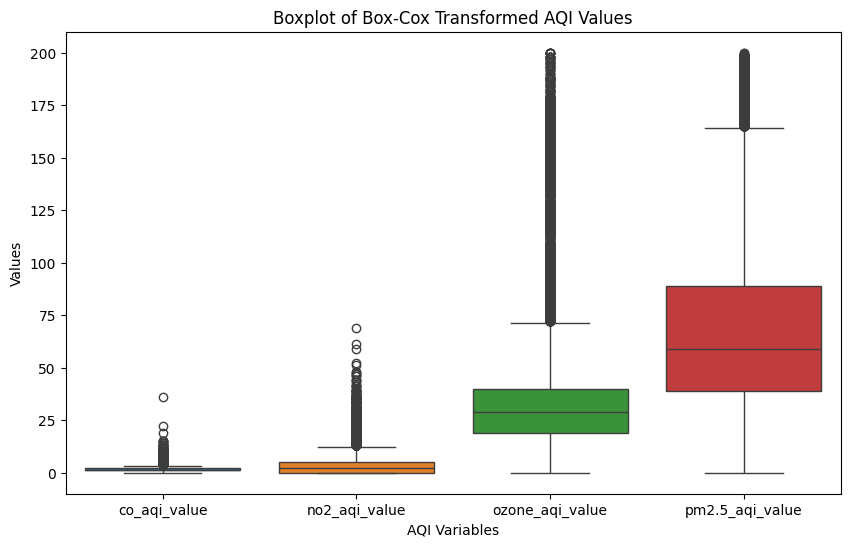

In [132]:
plt.figure(figsize=(10, 6))

# Vẽ boxplot cho các biến đã chuyển đổi
sns.boxplot(data=df[["co_aqi_value", "no2_aqi_value", "ozone_aqi_value", "pm2.5_aqi_value"]])

# Thiết lập tiêu đề và nhãn trục
plt.title('Boxplot of Box-Cox Transformed AQI Values')
plt.xlabel('AQI Variables')
plt.ylabel('Values')

# Hiển thị biểu đồ
plt.show()

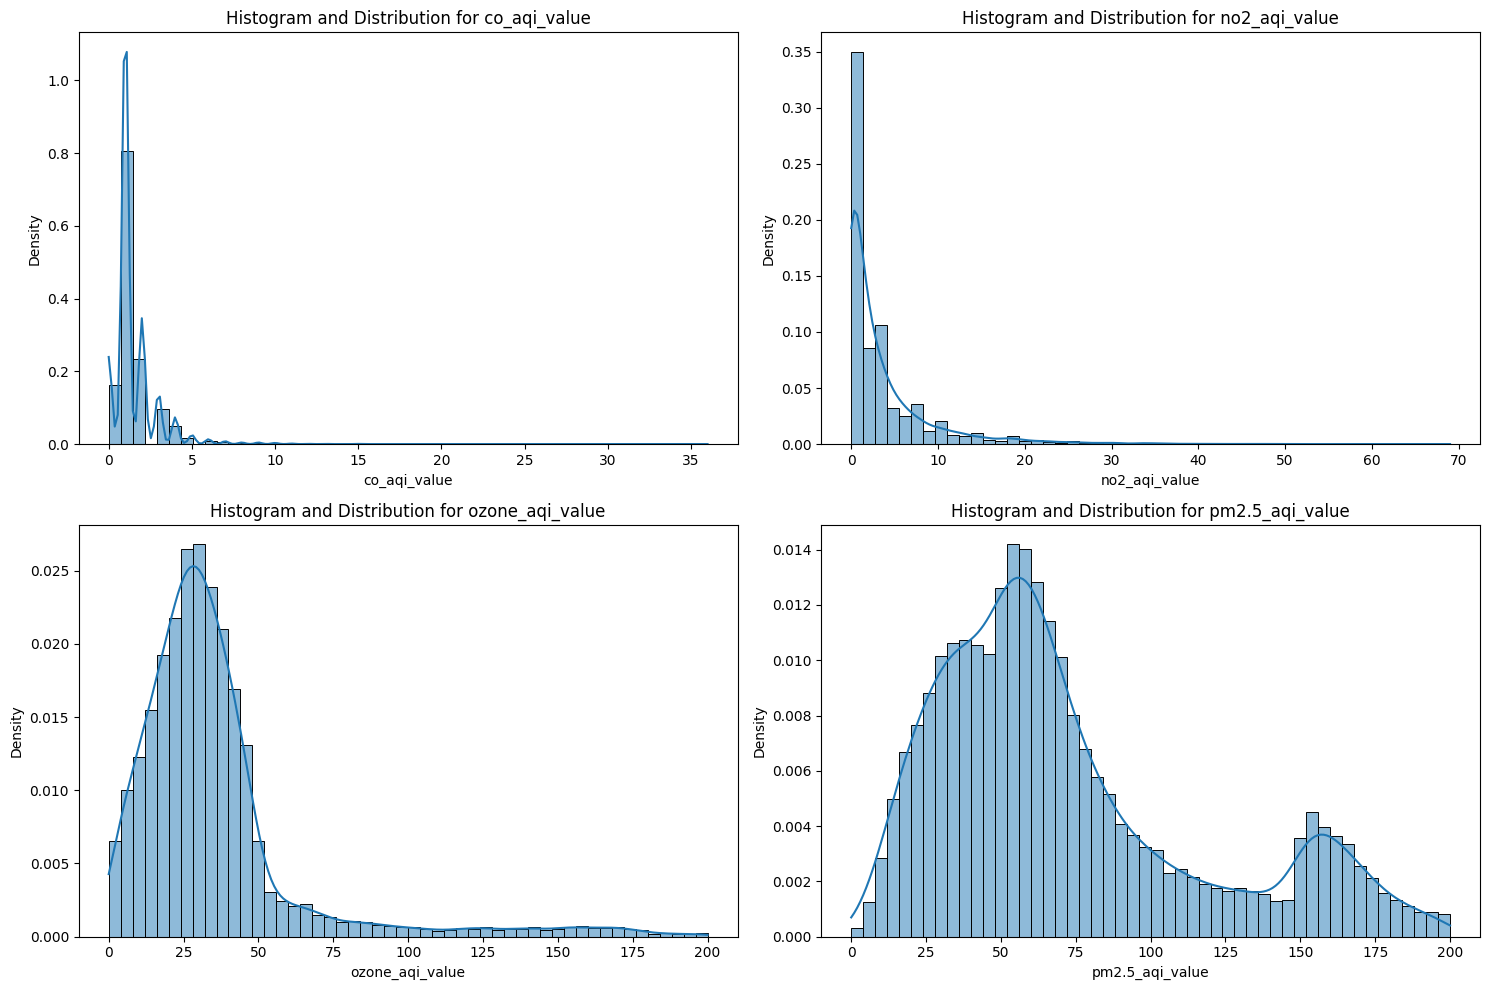

In [133]:
features = ['co_aqi_value' , 'no2_aqi_value', 'ozone_aqi_value', 'pm2.5_aqi_value']
# Vẽ histogram và đường phân phối
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Chia lưới 2x2
    sns.histplot(df[feature], bins=50, kde=True, stat="density", alpha=0.5)
    plt.title(f'Histogram and Distribution for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [134]:
skewness = df[["co_aqi_value", "no2_aqi_value", "ozone_aqi_value", "pm2.5_aqi_value"]].skew()
# Hiển thị kết quả
skewness


co_aqi_value       4.035449
no2_aqi_value      3.001337
ozone_aqi_value    2.728136
pm2.5_aqi_value    1.004858
dtype: float64

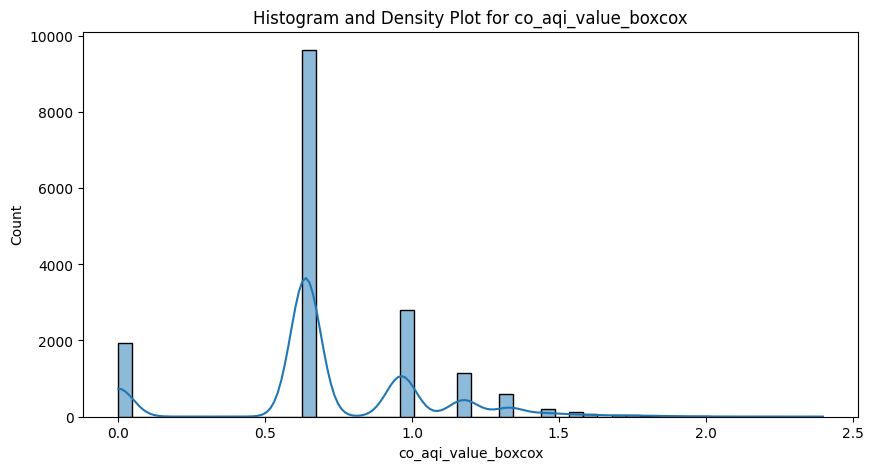

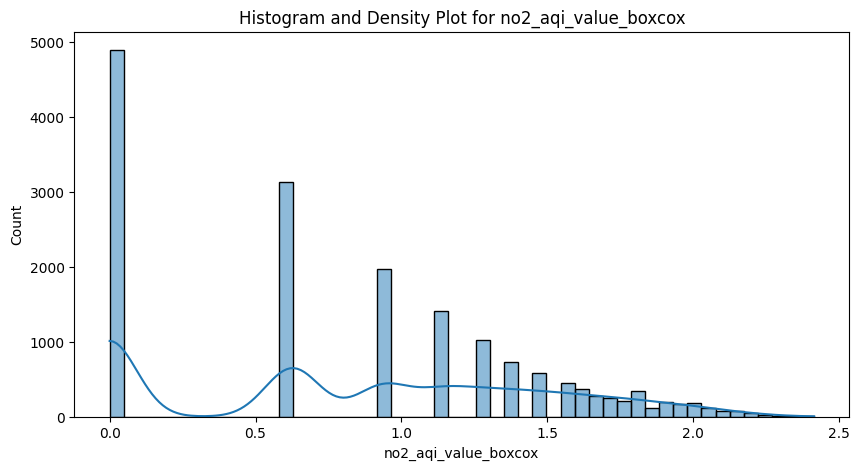

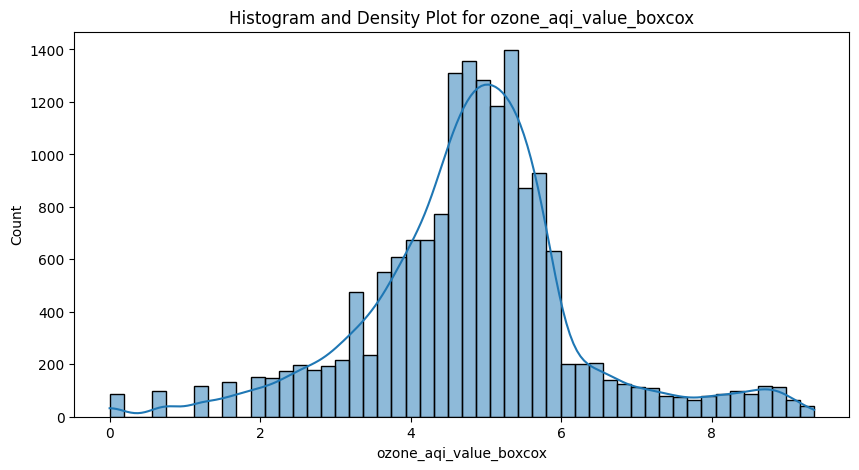

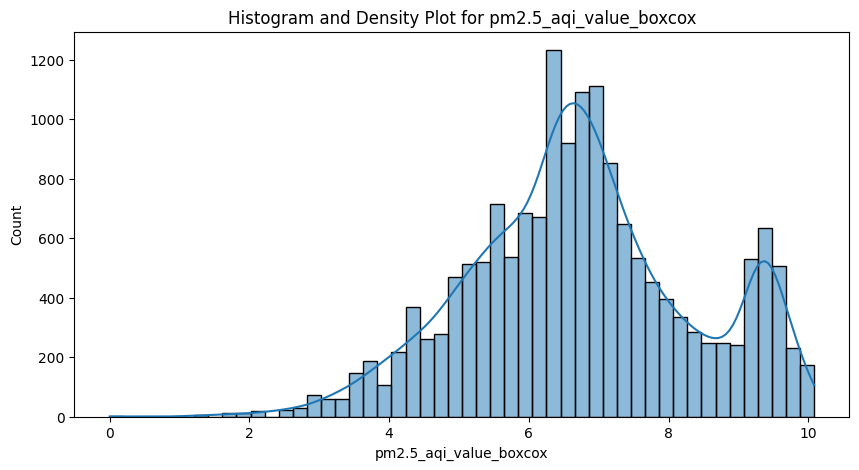

In [135]:
from scipy import stats

# Box-Cox Transformation (chỉ áp dụng cho dữ liệu dương)
df['co_aqi_value_boxcox'], _ = stats.boxcox(df['co_aqi_value'] + 1)  # Thêm 1 nếu có giá trị 0
df['no2_aqi_value_boxcox'], _ = stats.boxcox(df['no2_aqi_value'] + 1)
df['ozone_aqi_value_boxcox'], _ = stats.boxcox(df['ozone_aqi_value'] + 1)
df['pm2.5_aqi_value_boxcox'], _ = stats.boxcox(df['pm2.5_aqi_value'] + 1)

# Vẽ histogram và đường phân phối
for feature in ['co_aqi_value_boxcox', 'no2_aqi_value_boxcox', 'ozone_aqi_value_boxcox', 'pm2.5_aqi_value_boxcox']:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Histogram and Density Plot for {feature}')
    plt.show()

In [136]:
skewness = df[["co_aqi_value_boxcox", "no2_aqi_value_boxcox", "ozone_aqi_value_boxcox", "pm2.5_aqi_value_boxcox"]].skew()
# Hiển thị kết quả
skewness


co_aqi_value_boxcox      -0.031152
no2_aqi_value_boxcox      0.104089
ozone_aqi_value_boxcox    0.080331
pm2.5_aqi_value_boxcox   -0.010143
dtype: float64

In [ ]:
# Chọn các đặc trưng và nhãn
# X = df[["co_aqi_value_boxcox", "no2_aqi_value_boxcox", "ozone_aqi_value_boxcox", "pm2.5_aqi_value_boxcox"]]  # Chọn các đặc trưng
X = df[["ozone_aqi_value_boxcox", "pm2.5_aqi_value_boxcox"]]  # Chọn các đặc trưng
print(X)
y = df['aqi_category']  # Chọn nhãn

# Mã hóa nhãn
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

       ozone_aqi_value_boxcox  pm2.5_aqi_value_boxcox
0                    5.265874                6.309595
1                    2.149340                5.810170
2                    5.426065                6.933666
3                    5.153187                4.342493
4                    4.340572                2.431189
...                       ...                     ...
16625                8.744418                7.391569
16626                5.153187                6.444709
16627                8.641300                9.816596
16628                4.340572                6.263207
16629                5.672801                7.117352

[16630 rows x 2 columns]


In [138]:
for index, label in enumerate(label_encoder.classes_):
    print(f"{index} được gán cho lớp '{label}'")


0 được gán cho lớp 'Good'
1 được gán cho lớp 'Moderate'
2 được gán cho lớp 'Unhealthy'
3 được gán cho lớp 'Unhealthy for Sensitive Groups'


In [ ]:
# Đặt tỷ lệ chia dữ liệu
train_size = 0.7      # 70% cho training
val_size_relative = 2 / 3   # 20% của dữ liệu còn lại (30%) là validation => 2/3 của 30% 
test_size_relative = 1 / 3   # 10% của dữ liệu ban đầu là test => 1/3 của 30%

# Bước 1: Chia dữ liệu thành tập training và temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=1 - train_size, random_state=42)

# Bước 2: Chia temporary thành validation và test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size_relative, random_state=42)

print(f'Lớp Good trước khi oversampling: {y_train[y_train == 0].shape}')
print(f'Lớp Moderate trước khi oversampling: {y_train[y_train == 1].shape}')
print(f'Lớp Unhealthy trước khi oversampling: {y_train[y_train == 2].shape}')
print(f'Lớp Unhealthy for Sensitive Groups trước khi oversampling: {y_train[y_train == 3].shape}')

# Áp dụng SMOTE để cân bằng dữ liệu trên tập training
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# smote = SMOTE(sampling_strategy={2:4933, 3:4933}, random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

print()
print(f'Lớp Good sau khi oversampling: {y_train[y_train == 0].shape}')
print(f'Lớp Moderate sau khi oversampling: {y_train[y_train == 1].shape}')
print(f'Lớp Unhealthy sau khi oversampling: {y_train[y_train == 2].shape}')
print(f'Lớp Unhealthy for Sensitive Groups sau khi oversampling: {y_train[y_train == 3].shape}')
# Sử dụng PCA để giảm chiều dữ liệu xuống 2D cho dễ quan sát
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Lớp Good trước khi oversampling: (4182,)
Lớp Moderate trước khi oversampling: (4933,)
Lớp Unhealthy trước khi oversampling: (1418,)
Lớp Unhealthy for Sensitive Groups trước khi oversampling: (1107,)

Lớp Good sau khi oversampling: (4933,)
Lớp Moderate sau khi oversampling: (4933,)
Lớp Unhealthy sau khi oversampling: (4933,)
Lớp Unhealthy for Sensitive Groups sau khi oversampling: (4933,)


In [143]:
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.training_losses = []
        self.validation_losses = []
        self.training_accuracies = []
        self.validation_accuracies = []

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y, n_classes):
        return np.eye(n_classes)[y]

    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        for i in range(self.n_iter):
            # Tính toán dự đoán cho tập train
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(linear_model)

            # Tính toán training loss (cross-entropy loss)
            training_loss = -np.mean(np.log(y_predicted[range(n_samples), y]))  # Ensure y is integer labels
            self.training_losses.append(training_loss)

            # Cập nhật trọng số và độ dời
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - self.one_hot_encode(y, n_classes)))
            db = (1 / n_samples) * np.sum(y_predicted - self.one_hot_encode(y, n_classes), axis=0)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Tính toán accuracy trên tập training
            training_accuracy = self._compute_accuracy(X, y)
            self.training_accuracies.append(training_accuracy)

            # Tính toán loss và accuracy trên tập validation
            val_loss = self._compute_loss(X_val, y_val)
            val_accuracy = self._compute_accuracy(X_val, y_val)
            self.validation_losses.append(val_loss)
            self.validation_accuracies.append(val_accuracy)

            # In thông tin mỗi 100 epochs (thay vì 1000 epochs)
            if i % 1000 == 0:
                print(f"Epoch {i}, Training Loss: {training_loss:.4f}, Validation Loss: {val_loss:.4f}, "
                      f"Training Acc: {training_accuracy:.4f}, Validation Acc: {val_accuracy:.4f}")

    def _compute_loss(self, X, y):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(linear_model)
        return -np.mean(np.log(y_predicted[range(len(y)), y]))  

    def _compute_accuracy(self, X, y):
        y_predicted = self.predict(X)
        return np.mean(y_predicted == y)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = np.argmax(self.softmax(linear_model), axis=1)
        return y_predicted


In [144]:
# Khởi tạo và huấn luyện mô hình
softmax_model = SoftmaxRegression(learning_rate=0.1, n_iter=10000)
softmax_model.fit(X_train, y_train, X_val, y_val)


Epoch 0, Training Loss: 1.3863, Validation Loss: 1.3616, Training Acc: 0.5527, Validation Acc: 0.5204
Epoch 1000, Training Loss: 0.4654, Validation Loss: 0.4419, Training Acc: 0.8936, Validation Acc: 0.9080
Epoch 2000, Training Loss: 0.3891, Validation Loss: 0.3715, Training Acc: 0.9019, Validation Acc: 0.9083
Epoch 3000, Training Loss: 0.3532, Validation Loss: 0.3393, Training Acc: 0.9055, Validation Acc: 0.9080
Epoch 4000, Training Loss: 0.3319, Validation Loss: 0.3205, Training Acc: 0.9076, Validation Acc: 0.9080
Epoch 5000, Training Loss: 0.3178, Validation Loss: 0.3082, Training Acc: 0.9091, Validation Acc: 0.9101
Epoch 6000, Training Loss: 0.3078, Validation Loss: 0.2995, Training Acc: 0.9094, Validation Acc: 0.9098
Epoch 7000, Training Loss: 0.3004, Validation Loss: 0.2932, Training Acc: 0.9109, Validation Acc: 0.9107
Epoch 8000, Training Loss: 0.2947, Validation Loss: 0.2883, Training Acc: 0.9112, Validation Acc: 0.9107
Epoch 9000, Training Loss: 0.2902, Validation Loss: 0.2845

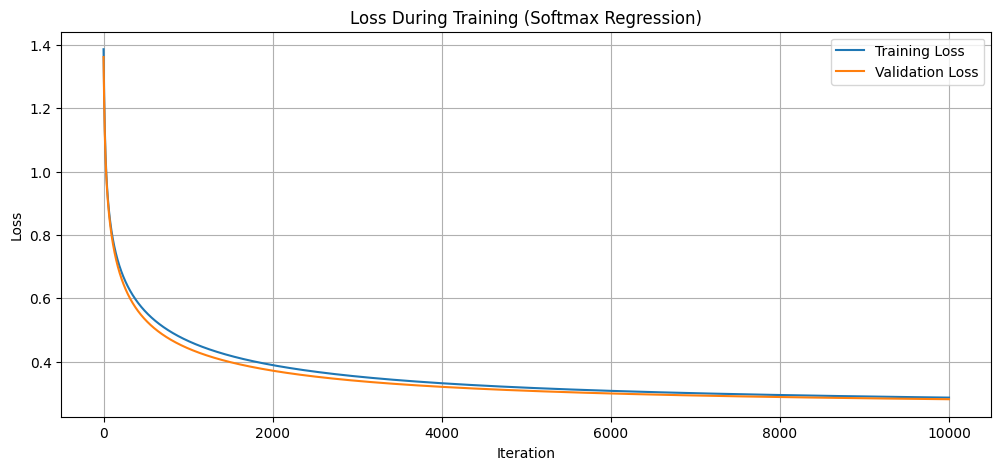

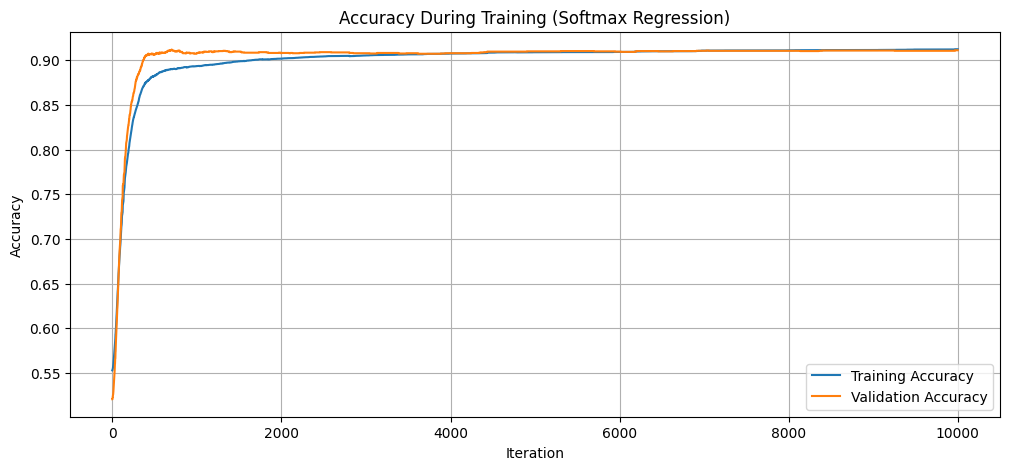

In [145]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Loss
plt.figure(figsize=(12, 5))
plt.plot(range(softmax_model.n_iter), softmax_model.training_losses, label='Training Loss')
plt.plot(range(softmax_model.n_iter), softmax_model.validation_losses, label='Validation Loss')
plt.title('Loss During Training (Softmax Regression)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(12, 5))
plt.plot(range(softmax_model.n_iter), softmax_model.training_accuracies, label='Training Accuracy')
plt.plot(range(softmax_model.n_iter), softmax_model.validation_accuracies, label='Validation Accuracy')
plt.title('Accuracy During Training (Softmax Regression)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()


In [146]:
y_pred_softmax = softmax_model.predict(X_test)
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
print(f"Softmax Regression Accuracy: {accuracy_softmax:.4f}")
print(classification_report(y_test, y_pred_softmax))


Softmax Regression Accuracy: 0.9069
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       587
           1       0.94      0.88      0.91       678
           2       0.91      0.94      0.92       234
           3       0.67      0.84      0.75       165

    accuracy                           0.91      1664
   macro avg       0.87      0.90      0.88      1664
weighted avg       0.91      0.91      0.91      1664



MLP Accuracy: 0.9994


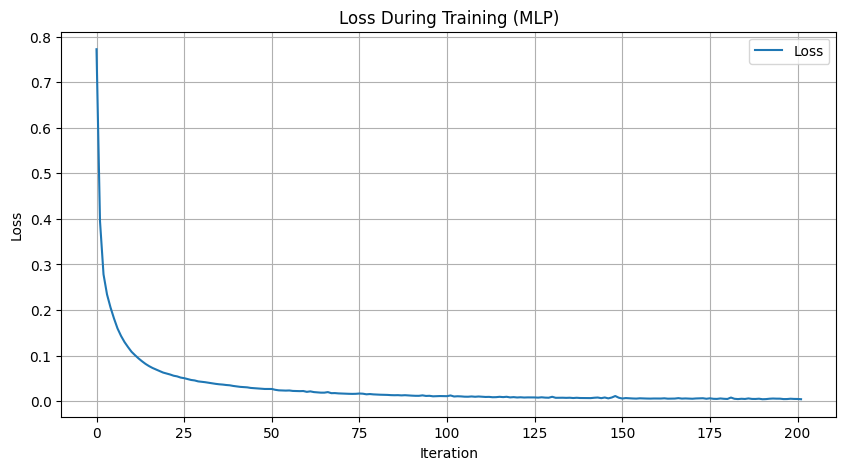

In [147]:
from sklearn.neural_network import MLPClassifier

# Huấn luyện mô hình MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='tanh', solver='adam', max_iter=1000, random_state = 42)
mlp_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_mlp = mlp_model.predict(X_test)

# Tính Accuracy
accuracy_mlp = mlp_model.score(X_test, y_test)
print(f"MLP Accuracy: {accuracy_mlp:.4f}")

# Vẽ loss
plt.figure(figsize=(10, 5))
plt.plot(mlp_model.loss_curve_, label='Loss')
plt.title('Loss During Training (MLP)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()



In [148]:
print(classification_report(y_test, y_pred_mlp))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       587
           1       1.00      1.00      1.00       678
           2       1.00      1.00      1.00       234
           3       1.00      0.99      1.00       165

    accuracy                           1.00      1664
   macro avg       1.00      1.00      1.00      1664
weighted avg       1.00      1.00      1.00      1664



(1664,)


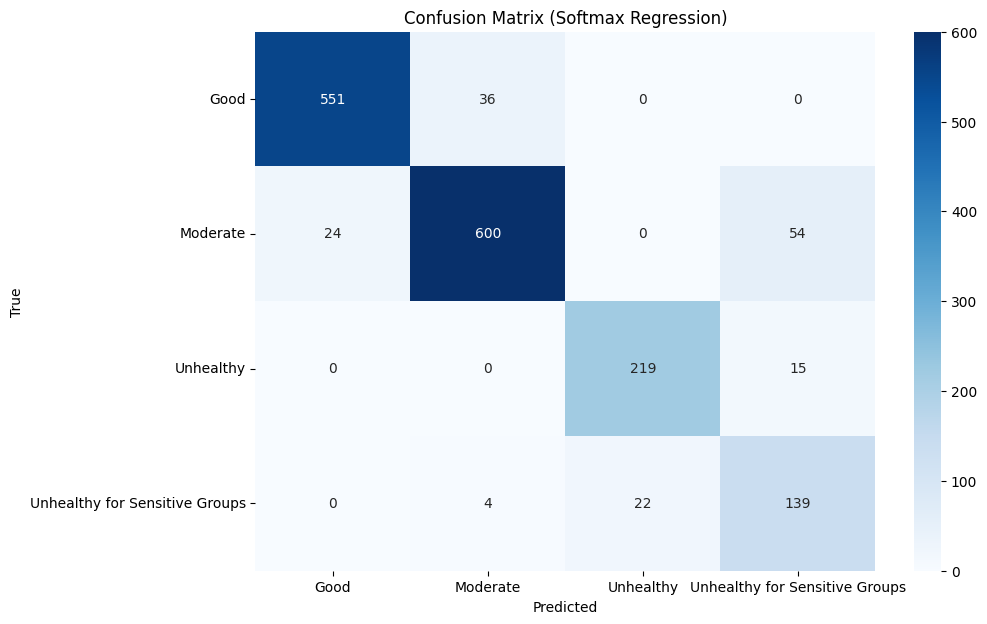

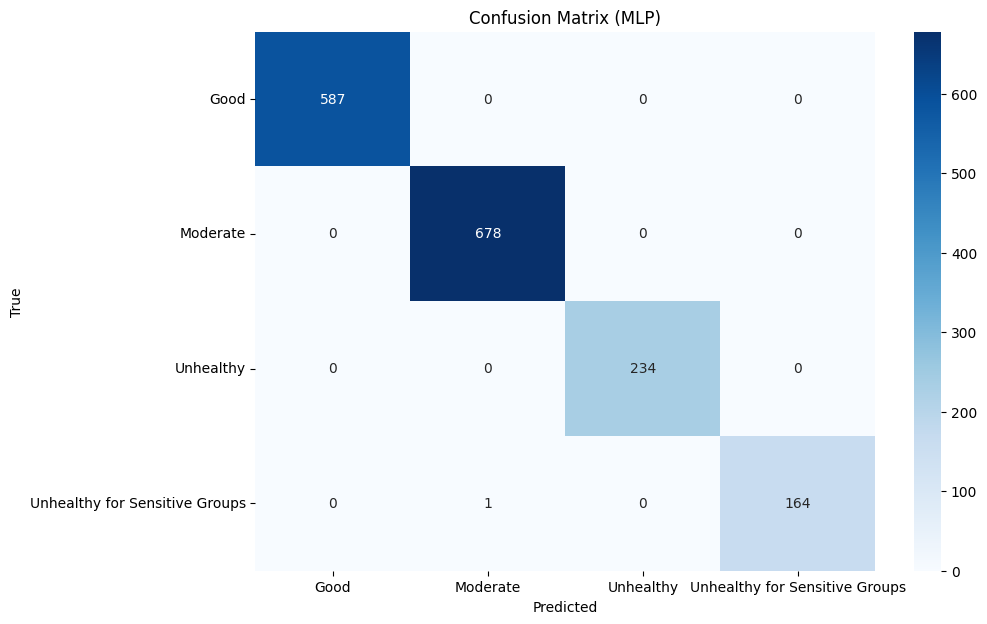

In [149]:
print(y_test.shape)

# Heatmap cho Softmax Regression
cm_softmax = confusion_matrix(y_test, y_pred_softmax)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_softmax, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Softmax Regression)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Heatmap cho MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (MLP)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
